Student ID: 16577                                                                                           
Title : Predicting IFC Investment Amounts and Environmental Impact Categories Using Machine Learning Techniques

1. Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from datetime import datetime

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [7]:
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

In [8]:
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

2. Load Dataset

In [11]:
df = pd.read_csv("C:/Users/admin/Desktop/Hybrid_ML/Dataset/ifc_investment_services_projects.csv")
df.head()

,Date Disclosed,Project Name,Document Type,Project Number,Product Line,Company Name,Country,IFC Country Code,Industry,Environmental Category,Department,Status,Projected Board Date,IFC investment for Risk Management(Million - USD),IFC investment for Guarantee(Million - USD),IFC investment for Loan(Million - USD),IFC investment for Equity(Million - USD),Total IFC investment as approved by Board(Million - USD),WB Country Code,As of Date,IFC Approval Date,IFC Invested Date,IFC Signed Date,Project Url
0,03/30/2023,BOP EU Tchad,Summary of Investment Information (AIP Policy ...,45483,Loan,EXPRESS UNION TCHAD,Chad,CHD,Financial Markets,FI-3 - No Impact,Regional Industry - FIG Africa,Active,05/01/2023,NaN,NaN,1.03,NaN,1.03,TD,12/04/2025,06/12/2023,07/17/2024,06/26/2023,https://disclosures.ifc.org/project-detail/SII...
1,12/04/2014,Millicom Tchad SA,Summary of Investment Information (AIP Policy ...,34297,Loan,MOOV AFRICA TCHAD SA,Chad,CHD,Telecommunications and Technology,B - Limited,"TMT, Venture Capital &amp; Funds",Completed,05/27/2014,NaN,NaN,76.06,NaN,76.06,TD,12/04/2025,05/30/2014,08/22/2014,06/06/2014,https://disclosures.ifc.org/project-detail/SII...
2,04/30/2013,Chad Clinic,Summary of Investment Information (AIP Policy ...,32607,Loan,CLINIQUE PROVIDENCE,Chad,CHD,"Health, Education and Life Sciences",B - Limited,Regional Industry - MAS Africa,Active,05/30/2013,NaN,NaN,1.38,NaN,1.38,TD,12/04/2025,05/06/2015,12/30/2015,05/27/2015,https://disclosures.ifc.org/project-detail/SII...
3,04/19/2010,Aubaine Graphic SA Printing Chad,Summary of Proposed Investment (Disclosure Pol...,29084,Loan,Imprimerie Aubaine Graphic,Chad,CHD,Agribusiness and Forestry,B - Limited,Regional Industry - MAS Africa,Completed,05/20/2010,NaN,NaN,2.83,NaN,2.83,TD,12/04/2025,06/28/2010,02/22/2012,06/30/2010,https://disclosures.ifc.org/project-detail/SPI...
4,03/04/2010,Ecobank Chad,Summary of Proposed Investment (Disclosure Pol...,29317,Loan,ECOBANK TCHAD SA,Chad,CHD,Financial Markets,FI,Banking and Capital Markets,Completed,04/05/2010,NaN,NaN,3.08,NaN,3.08,TD,12/04/2025,04/29/2010,03/01/2011,06/29/2010,https://disclosures.ifc.org/project-detail/SPI...


In [13]:
# Shape of dataset
df.shape

# Dataset info
df.info()

# Preview summary statistics
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6777 entries, 0 to 6776
Data columns (total 24 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Date Disclosed                                            6777 non-null   object 
 1   Project Name                                              6777 non-null   object 
 2   Document Type                                             6777 non-null   object 
 3   Project Number                                            6777 non-null   int64  
 4   Product Line                                              6497 non-null   object 
 5   Company Name                                              6754 non-null   object 
 6   Country                                                   6777 non-null   object 
 7   IFC Country Code                                          5956 non-null   object 
 8   Industry          

,Date Disclosed,Project Name,Document Type,Project Number,Product Line,Company Name,Country,IFC Country Code,Industry,Environmental Category,Department,Status,Projected Board Date,IFC investment for Risk Management(Million - USD),IFC investment for Guarantee(Million - USD),IFC investment for Loan(Million - USD),IFC investment for Equity(Million - USD),Total IFC investment as approved by Board(Million - USD),WB Country Code,As of Date,IFC Approval Date,IFC Invested Date,IFC Signed Date,Project Url
count,6777,6777,6777,6777.000000,6497,6754,6777,5956,6777,6777,6777,6777,5885,202.000000,400.000000,4806.000000,2308.00000,6498.000000,6442,6777,6529,6022,6289,6777
unique,4090,6760,2,NaN,4,5134,170,121,10,8,141,6,3250,NaN,NaN,NaN,NaN,NaN,152,1,3443,3906,3688,6777
top,02/05/2010,Nanjing City Commercial Bank,Summary of Investment Information (AIP Policy ...,NaN,Loan,INTERNATIONAL FINANCE CORPORATION,India,IND,Financial Markets,B - Limited,"Global Industry, Financial Markets",Completed,12/22/2023,NaN,NaN,NaN,NaN,NaN,IN,12/04/2025,11/11/2004,12/20/2012,06/30/2022,https://disclosures.ifc.org/project-detail/SII...
freq,12,2,3491,NaN,4453,20,532,532,2565,3037,889,4113,14,NaN,NaN,NaN,NaN,NaN,532,6777,56,8,31,1
mean,NaN,NaN,NaN,34732.320201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.553713,168.177350,50.324370,23.44078,56.071568,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,43526.017163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.631027,316.049388,110.644166,43.19616,132.516219,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,3402.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.00000,0.020000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,24398.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,8.560000,10.000000,3.05000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,32258.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500000,30.000000,25.000000,10.00000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,42773.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.210000,100.000000,55.842500,25.00000,54.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
date_cols = ['Date Disclosed', 'Projected Board Date', 'IFC Approval Date',
             'IFC Signed Date', 'IFC Invested Date', 'As of Date']

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')


In [15]:
df.describe(include='all')

C:\Users\admin\AppData\Local\Temp\ipykernel_22432\2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')
C:\Users\admin\AppData\Local\Temp\ipykernel_22432\2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')
C:\Users\admin\AppData\Local\Temp\ipykernel_22432\2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.


,Date Disclosed,Project Name,Document Type,Project Number,Product Line,Company Name,Country,IFC Country Code,Industry,Environmental Category,Department,Status,Projected Board Date,IFC investment for Risk Management(Million - USD),IFC investment for Guarantee(Million - USD),IFC investment for Loan(Million - USD),IFC investment for Equity(Million - USD),Total IFC investment as approved by Board(Million - USD),WB Country Code,As of Date,IFC Approval Date,IFC Invested Date,IFC Signed Date,Project Url
count,6777,6777,6777,6777.000000,6497,6754,6777,5956,6777,6777,6777,6777,5885,202.000000,400.000000,4806.000000,2308.00000,6498.000000,6442,6777,6529,6022,6289,6777
unique,4090,6760,2,NaN,4,5134,170,121,10,8,141,6,3250,NaN,NaN,NaN,NaN,NaN,152,1,3443,3906,3688,6777
top,2010-02-05 00:00:00,Nanjing City Commercial Bank,Summary of Investment Information (AIP Policy ...,NaN,Loan,INTERNATIONAL FINANCE CORPORATION,India,IND,Financial Markets,B - Limited,"Global Industry, Financial Markets",Completed,2023-12-22 00:00:00,NaN,NaN,NaN,NaN,NaN,IN,2025-12-04 00:00:00,2004-11-11 00:00:00,2012-12-20 00:00:00,2022-06-30 00:00:00,https://disclosures.ifc.org/project-detail/SII...
freq,12,2,3491,NaN,4453,20,532,532,2565,3037,889,4113,14,NaN,NaN,NaN,NaN,NaN,532,6777,56,8,31,1
first,1994-10-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994-11-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2025-12-04 00:00:00,1993-11-01 00:00:00,1994-01-28 00:00:00,1993-06-24 00:00:00,NaN
last,2025-12-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2026-04-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2025-12-04 00:00:00,2025-11-26 00:00:00,2025-11-27 00:00:00,2025-11-28 00:00:00,NaN
mean,NaN,NaN,NaN,34732.320201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.553713,168.177350,50.324370,23.44078,56.071568,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,43526.017163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.631027,316.049388,110.644166,43.19616,132.516219,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,3402.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.00000,0.020000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,24398.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,8.560000,10.000000,3.05000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.head()

,Date Disclosed,Project Name,Document Type,Project Number,Product Line,Company Name,Country,IFC Country Code,Industry,Environmental Category,Department,Status,Projected Board Date,IFC investment for Risk Management(Million - USD),IFC investment for Guarantee(Million - USD),IFC investment for Loan(Million - USD),IFC investment for Equity(Million - USD),Total IFC investment as approved by Board(Million - USD),WB Country Code,As of Date,IFC Approval Date,IFC Invested Date,IFC Signed Date,Project Url
0,2023-03-30,BOP EU Tchad,Summary of Investment Information (AIP Policy ...,45483,Loan,EXPRESS UNION TCHAD,Chad,CHD,Financial Markets,FI-3 - No Impact,Regional Industry - FIG Africa,Active,2023-05-01,NaN,NaN,1.03,NaN,1.03,TD,2025-12-04,2023-06-12,2024-07-17,2023-06-26,https://disclosures.ifc.org/project-detail/SII...
1,2014-12-04,Millicom Tchad SA,Summary of Investment Information (AIP Policy ...,34297,Loan,MOOV AFRICA TCHAD SA,Chad,CHD,Telecommunications and Technology,B - Limited,"TMT, Venture Capital &amp; Funds",Completed,2014-05-27,NaN,NaN,76.06,NaN,76.06,TD,2025-12-04,2014-05-30,2014-08-22,2014-06-06,https://disclosures.ifc.org/project-detail/SII...
2,2013-04-30,Chad Clinic,Summary of Investment Information (AIP Policy ...,32607,Loan,CLINIQUE PROVIDENCE,Chad,CHD,"Health, Education and Life Sciences",B - Limited,Regional Industry - MAS Africa,Active,2013-05-30,NaN,NaN,1.38,NaN,1.38,TD,2025-12-04,2015-05-06,2015-12-30,2015-05-27,https://disclosures.ifc.org/project-detail/SII...
3,2010-04-19,Aubaine Graphic SA Printing Chad,Summary of Proposed Investment (Disclosure Pol...,29084,Loan,Imprimerie Aubaine Graphic,Chad,CHD,Agribusiness and Forestry,B - Limited,Regional Industry - MAS Africa,Completed,2010-05-20,NaN,NaN,2.83,NaN,2.83,TD,2025-12-04,2010-06-28,2012-02-22,2010-06-30,https://disclosures.ifc.org/project-detail/SPI...
4,2010-03-04,Ecobank Chad,Summary of Proposed Investment (Disclosure Pol...,29317,Loan,ECOBANK TCHAD SA,Chad,CHD,Financial Markets,FI,Banking and Capital Markets,Completed,2010-04-05,NaN,NaN,3.08,NaN,3.08,TD,2025-12-04,2010-04-29,2011-03-01,2010-06-29,https://disclosures.ifc.org/project-detail/SPI...


In [17]:
df.describe()


,Project Number,IFC investment for Risk Management(Million - USD),IFC investment for Guarantee(Million - USD),IFC investment for Loan(Million - USD),IFC investment for Equity(Million - USD),Total IFC investment as approved by Board(Million - USD)
count,6777.000000,202.000000,400.000000,4806.000000,2308.00000,6498.000000
mean,34732.320201,5.553713,168.177350,50.324370,23.44078,56.071568
std,43526.017163,11.631027,316.049388,110.644166,43.19616,132.516219
min,3402.000000,0.000000,0.000000,0.000000,0.00000,0.020000
25%,24398.000000,1.000000,8.560000,10.000000,3.05000,10.000000
50%,32258.000000,2.500000,30.000000,25.000000,10.00000,25.000000
75%,42773.000000,5.210000,100.000000,55.842500,25.00000,54.000000
max,574447.000000,100.000000,1500.000000,3115.000000,1003.00000,3115.000000


In [18]:
df.describe(include='object')


,Project Name,Document Type,Product Line,Company Name,Country,IFC Country Code,Industry,Environmental Category,Department,Status,WB Country Code,Project Url
count,6777,6777,6497,6754,6777,5956,6777,6777,6777,6777,6442,6777
unique,6760,2,4,5134,170,121,10,8,141,6,152,6777
top,Nanjing City Commercial Bank,Summary of Investment Information (AIP Policy ...,Loan,INTERNATIONAL FINANCE CORPORATION,India,IND,Financial Markets,B - Limited,"Global Industry, Financial Markets",Completed,IN,https://disclosures.ifc.org/project-detail/SII...
freq,2,3491,4453,20,532,532,2565,3037,889,4113,532,1


In [20]:
date_columns = ['Date Disclosed', 'Projected Board Date', 'IFC Approval Date',
             'IFC Signed Date', 'IFC Invested Date', 'As of Date']
df[date_columns].apply(pd.to_datetime).describe()


C:\Users\admin\AppData\Local\Temp\ipykernel_22432\3231142894.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df[date_columns].apply(pd.to_datetime).describe()
C:\Users\admin\AppData\Local\Temp\ipykernel_22432\3231142894.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df[date_columns].apply(pd.to_datetime).describe()
C:\Users\admin\AppData\Local\Temp\ipykernel_22432\3231142894.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence th

,Date Disclosed,Projected Board Date,IFC Approval Date,IFC Signed Date,IFC Invested Date,As of Date
count,6777,5885,6529,6289,6022,6777
unique,4090,3250,3443,3688,3906,1
top,2010-02-05 00:00:00,2023-12-22 00:00:00,2004-11-11 00:00:00,2022-06-30 00:00:00,2012-12-20 00:00:00,2025-12-04 00:00:00
freq,12,14,56,31,8,6777
first,1994-10-31 00:00:00,1994-11-29 00:00:00,1993-11-01 00:00:00,1993-06-24 00:00:00,1994-01-28 00:00:00,2025-12-04 00:00:00
last,2025-12-03 00:00:00,2026-04-30 00:00:00,2025-11-26 00:00:00,2025-11-28 00:00:00,2025-11-27 00:00:00,2025-12-04 00:00:00


In [21]:
df.isnull().sum().sort_values(ascending=False)


IFC investment for Risk Management(Million - USD)           6575
IFC investment for Guarantee(Million - USD)                 6377
IFC investment for Equity(Million - USD)                    4469
IFC investment for Loan(Million - USD)                      1971
Projected Board Date                                         892
IFC Country Code                                             821
IFC Invested Date                                            755
IFC Signed Date                                              488
WB Country Code                                              335
Product Line                                                 280
Total IFC investment as approved by Board(Million - USD)     279
IFC Approval Date                                            248
Company Name                                                  23
As of Date                                                     0
Date Disclosed                                                 0
Project Name             

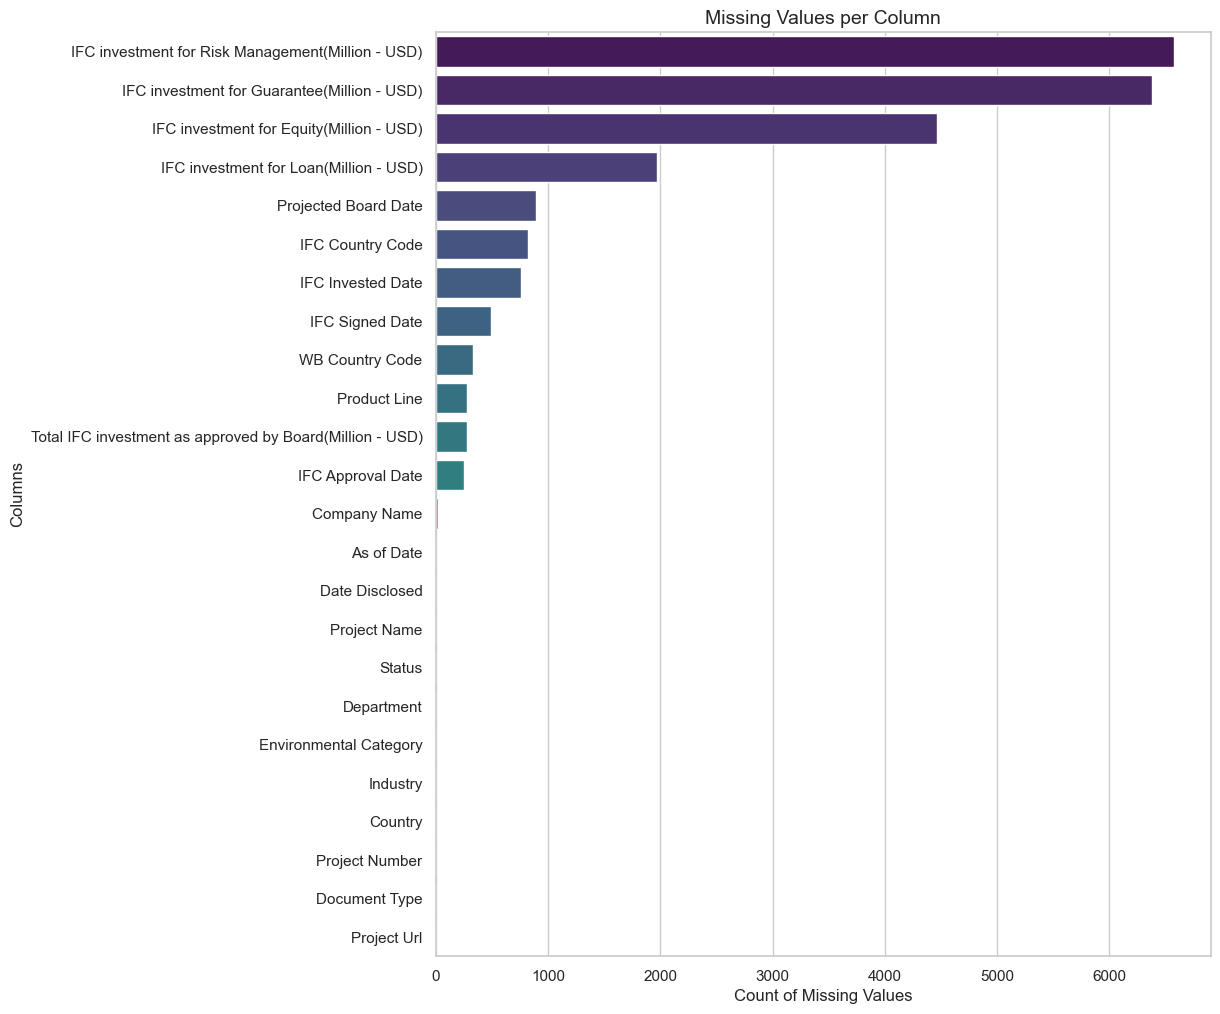

In [22]:
# Missing values count
missing_counts = df.isnull().sum().sort_values(ascending=False)

plt.figure(figsize=(10, 12))
sns.barplot(x=missing_counts, y=missing_counts.index, palette='viridis')
plt.title("Missing Values per Column", fontsize=14)
plt.xlabel("Count of Missing Values")
plt.ylabel("Columns")
plt.show()


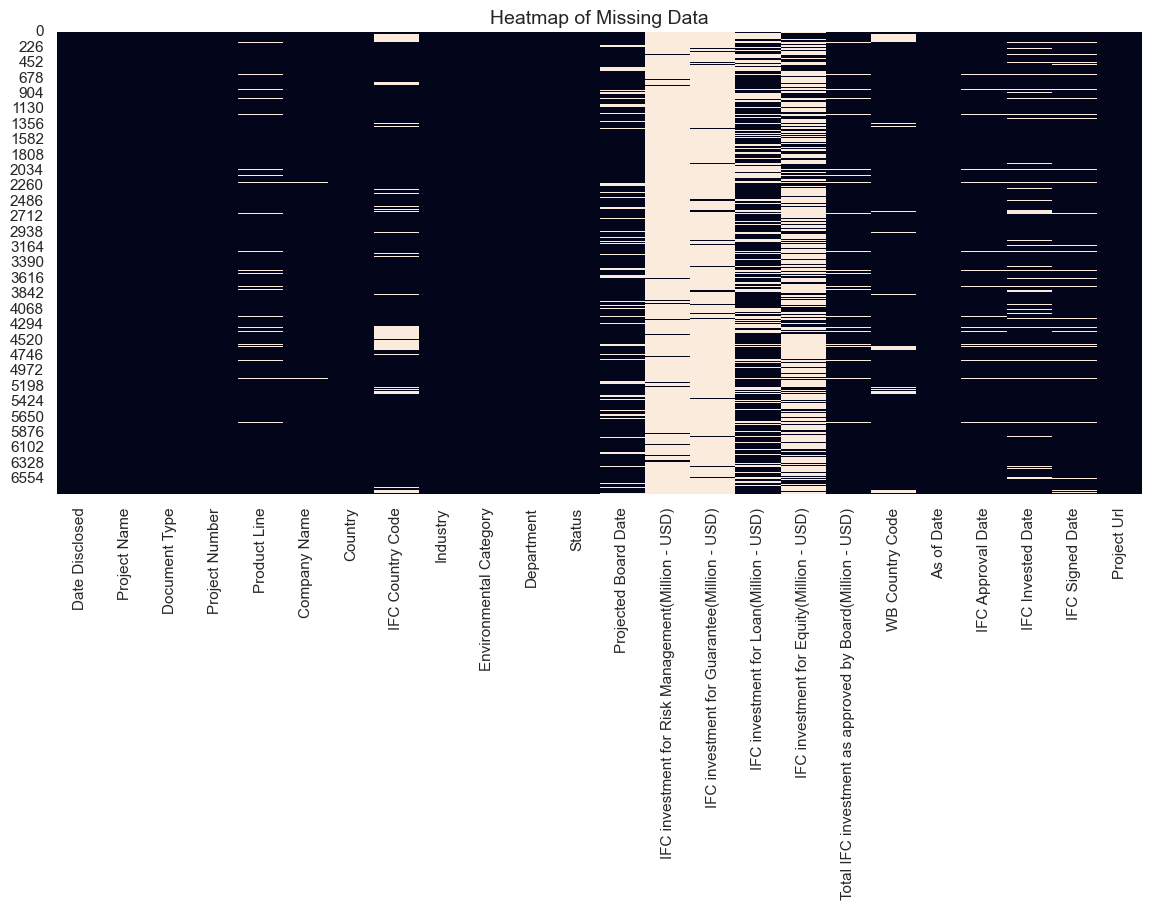

In [23]:
plt.figure(figsize=(14, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Heatmap of Missing Data", fontsize=14)
plt.show()



In [24]:
df.dtypes.value_counts()


object            12
datetime64[ns]     6
float64            5
int64              1
dtype: int64

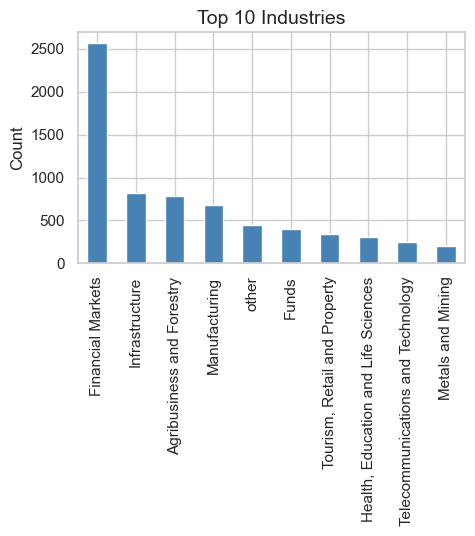

In [27]:
plt.figure(figsize=(5,3))
df['Industry'].value_counts().head(10).plot(kind='bar', color='steelblue')
plt.title("Top 10 Industries", fontsize=14)
plt.ylabel("Count")
plt.show()


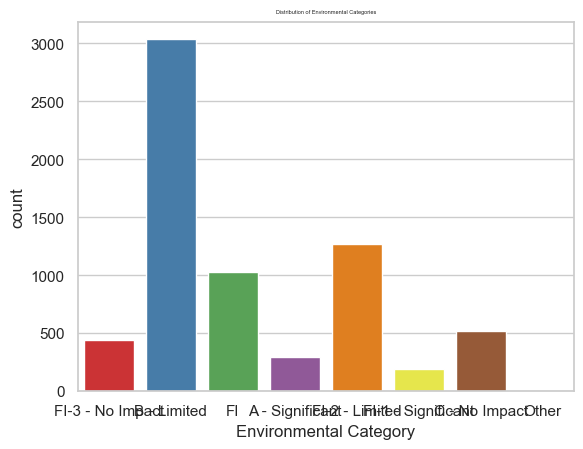

In [32]:
sns.countplot(data=df, x='Environmental Category', palette='Set1')
plt.title("Distribution of Environmental Categories", fontsize=4)
plt.show()


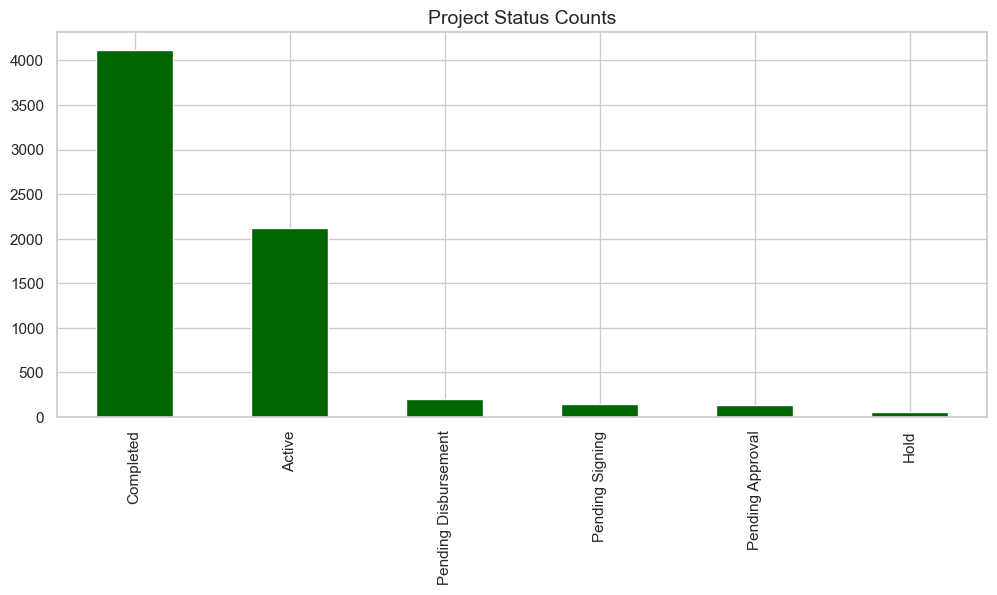

In [33]:
plt.figure(figsize=(12,5))
df['Status'].value_counts().plot(kind='bar', color='darkgreen')
plt.title("Project Status Counts", fontsize=14)
plt.show()
